In [ ]:
from keras.models import load_model
from numpy.random import randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
!unzip "/content/drive/MyDrive/Dataset_mit (2).zip"

Streaming output truncated to the last 5000 lines.
  inflating: Dataset_mit/Output/a0002-dgw_005.jpg  
  inflating: Dataset_mit/Output/a0003-NKIM_MG_8178.jpg  
  inflating: Dataset_mit/Output/a0004-jmac_MG_1384.jpg  
  inflating: Dataset_mit/Output/a0005-jn_2007_05_10__564.jpg  
  inflating: Dataset_mit/Output/a0006-IMG_2787.jpg  
  inflating: Dataset_mit/Output/a0007-IMG_2480.jpg  
  inflating: Dataset_mit/Output/a0008-WP_CRW_3959.jpg  
  inflating: Dataset_mit/Output/a0009-kme_372.jpg  
  inflating: Dataset_mit/Output/a0010-jmac_MG_4807.jpg  
  inflating: Dataset_mit/Output/a0011-DSC_0082.jpg  
  inflating: Dataset_mit/Output/a0012-kme_143.jpg  
  inflating: Dataset_mit/Output/a0013-MB_20030906_001.jpg  
  inflating: Dataset_mit/Output/a0014-WP_CRW_6320.jpg  
  inflating: Dataset_mit/Output/a0015-DSC_0081.jpg  
  inflating: Dataset_mit/Output/a0016-jmac_MG_0795.jpg  
  inflating: Dataset_mit/Output/a0017-050710_031618__MG_3496.jpg  
  inflating: Dataset_mit/Output/a0018-kme_234.jpg  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import time

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Conv2D, Input, MaxPool2D, Conv2DTranspose, concatenate, Lambda, BatchNormalization, Activation, LeakyReLU, ReLU
from keras.utils import img_to_array, load_img, plot_model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from fastai.vision.all import *
import PIL
import shutil

In [ ]:
### model
model = tf.keras.models.load_model("/content/drive/MyDrive/GAN_Raw_to_edit.h5")

In [ ]:
path = '/content/Dataset_mit/input_test'
path_out = '/content/Dataset_mit/output_test'
num_images = 500

input_images= sorted(glob.glob(path + "/*.jpg"))[:num_images]
output_images = sorted(glob.glob(path_out + "/*.jpg"))[:num_images]

images = np.zeros(shape=(len(input_images), 256, 256, 3))
masks = np.zeros(shape=(len(output_images), 256, 256, 3))

for idx, path in enumerate(input_images):
    combined_image = tf.cast(img_to_array(load_img(path)), tf.float32)
    images[idx] = (combined_image)/255

for idx, path in enumerate(output_images):
    combined_image = tf.cast(img_to_array(load_img(path)), tf.float32)
    masks[idx] = (combined_image)/255

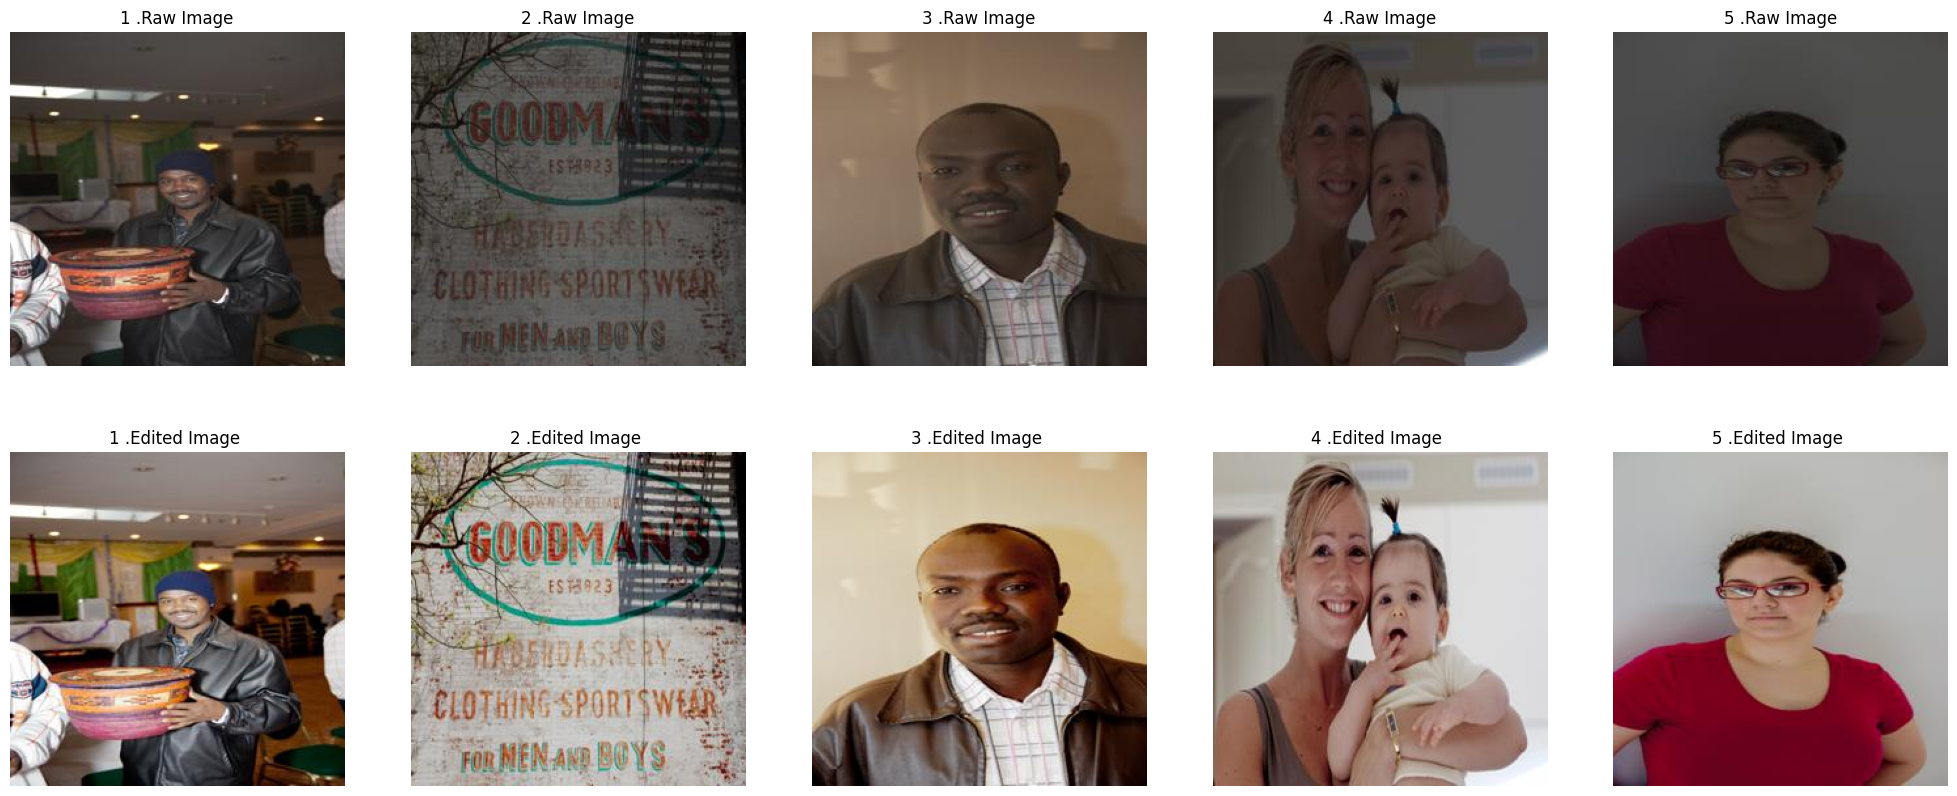

In [ ]:
plt.figure(figsize=(25,10))
for i in range(1,6):
    idx = np.random.randint(1,500)
    image, mask = images[idx], masks[idx]
    plt.subplot(2,5,i)
    plt.imshow(image)
    plt.title(str(i) + " .Raw Image")
    plt.axis("off")

    plt.subplot(2,5,i + 5)
    plt.imshow(mask)
    plt.title(str(i) + " .Edited Image ")
    plt.axis("off")
plt.show()

In [ ]:
raw_image, edit_image = tf.cast(images, tf.float32), tf.cast(masks, tf.float32)
dataset = (raw_image,edit_image)
data = tf.data.Dataset.from_tensor_slices(dataset).batch(32, drop_remainder=True)

In [ ]:
def show_predictions(num_samples):
    for i in range(num_samples):
        idx = np.random.randint(images.shape[0])
        image, mask = images[idx], masks[idx]
        predicted = model.predict(tf.expand_dims(image, axis=0))[0]

        plt.figure(figsize=(10,8))

        plt.subplot(1,3,1)
        plt.imshow(image)
        plt.title("RAW Image " + str(i + 1))
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(mask)
        plt.title("Edit Image " + str(i + 1))
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(predicted)
        plt.title("Predicted Image " + str(i + 1))
        plt.axis('off')

        plt.show()

In [ ]:
show_predictions(5)